# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11538.0,4.999885e+08,2.908648e+08,18347.00,2.450997e+08,5.002011e+08,7.539874e+08,9.999878e+08
height,11208.0,1.766282e+00,1.127187e-01,1.21,1.690000e+00,1.760000e+00,1.840000e+00,2.210000e+00
weight,10879.0,7.206820e+01,1.617733e+01,31.00,6.000000e+01,7.000000e+01,8.100000e+01,1.700000e+02
gold,11538.0,5.772231e-02,2.559099e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
silver,11538.0,5.676894e-02,2.391471e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
bronze,11538.0,6.101577e-02,2.433202e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [7]:
pd.DataFrame({
    'column': np.array(athletes.columns),
    'quantity_null': np.array(athletes.isnull().sum()),
    'percent_null': np.array(athletes.isnull().sum() / athletes.shape[0])
})

,column,quantity_null,percent_null
0,id,0,0.000000
1,name,0,0.000000
2,nationality,0,0.000000
3,sex,0,0.000000
4,dob,1,0.000087
5,height,330,0.028601
6,weight,659,0.057116
7,sport,0,0.000000
8,gold,0,0.000000
9,silver,0,0.000000


# Histograma das features `height` e `weight`

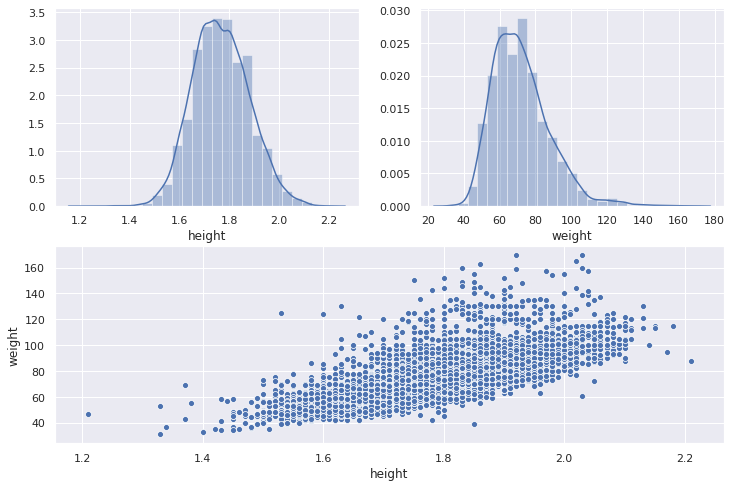

In [8]:
plt.subplot(2, 2, 1)
ax1 = sns.distplot(athletes['height'].dropna(), kde=True, bins=25)
#plt.title('height')

plt.subplot(2, 2, 2)
ax2 = sns.distplot(athletes['weight'].dropna(), kde=True, bins=25)
#plt.title('weight')

plt.subplot(2, 1, 2)
ax3 = sns.scatterplot(x=athletes['height'].dropna(), y=athletes['weight'].dropna())
#plt.title('sin(x)*cos(x)')

plt.show()

# Gráfico de normalidade das amostras de `height` e `weight`

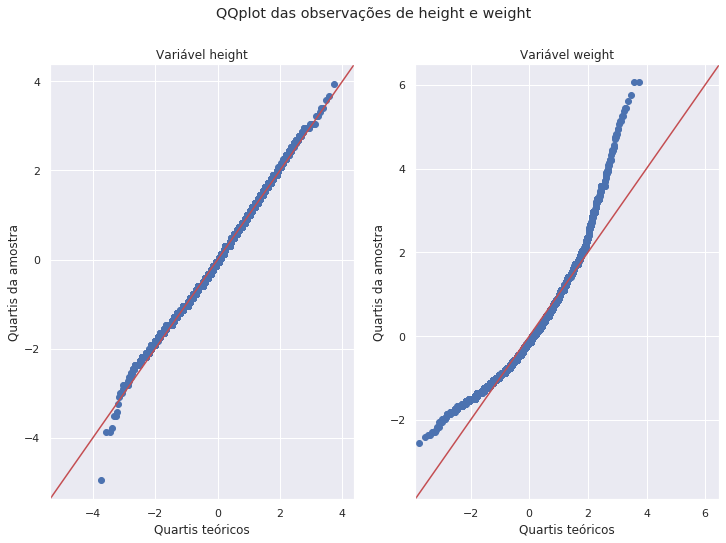

In [31]:
ax_height = plt.subplot(1, 2, 1)
sm.qqplot(athletes['height'].dropna(), fit=True, line="45", ax=ax_height)
ax_height.set(xlabel="Quartis teóricos", ylabel = "Quartis da amostra")
plt.title('Variável height')

ax_weight = plt.subplot(1, 2, 2)
sm.qqplot(athletes['weight'].dropna(), fit=True, line="45", ax=ax_weight)
ax_weight.set(xlabel="Quartis teóricos", ylabel = "Quartis da amostra")
plt.title('Variável weight')

plt.suptitle('QQplot das observações de height e weight')
plt.show()

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q1():
    # p-values is element 1 of tuple for test scipy.stats.shapiro and 5% is equal 0.05
    return bool(sct.shapiro(get_sample(athletes, 'height', 3000))[1] >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [11]:
def q2():
    # p-values is element 1 of tuple for test scipy.stats.jarque_bera and 5% is equal 0.05
    return bool(sct.jarque_bera(get_sample(athletes, 'height', 3000))[1] >= 0.05)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [12]:
def q3():
    return bool(sct.normaltest(get_sample(athletes, 'weight', 3000)).pvalue >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
def q4():
    # Log function applied to 'weight' sample of length 3000, repeating test D with alpha = 0.05
    # Warn: logx(0) = undefined
    return bool(sct.normaltest(np.log(get_sample(athletes,'weight', n=3000))).pvalue >= 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [14]:
def q5():
    # Calculate the T-test for the means of two independent samples of scores
    # Assuming the variation is different (equal_var = False)
    return bool(sct.ttest_ind(athletes[athletes.nationality == 'BRA'].height,
                              athletes[athletes.nationality == 'USA'].height, 
                              nan_policy = 'omit', 
                              equal_var = False).pvalue >= 0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [15]:
def q6():
    # Calculate the T-test for the means of two independent samples of scores
    # Assuming the variation is different (equal_var = False)
    return bool(sct.ttest_ind(athletes[athletes.nationality == 'BRA'].height,
                              athletes[athletes.nationality == 'CAN'].height, 
                              nan_policy = 'omit', 
                              equal_var = False).pvalue >= 0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [16]:
def q7():
    # Calculate the T-test for the means of two independent samples of scores
    # Assuming the variation is different (equal_var = False)
    return round(float(sct.ttest_ind(athletes[athletes.nationality == 'USA'].height,
                              athletes[athletes.nationality == 'CAN'].height, 
                              nan_policy = 'omit', 
                              equal_var = False).pvalue), 8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?